In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [4]:
df = pd.read_csv("winequality-all.csv", delimiter=';', header=0)

In [6]:
#dfi.export(df.head(), 'first_5_rows.png')
df.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.describe()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


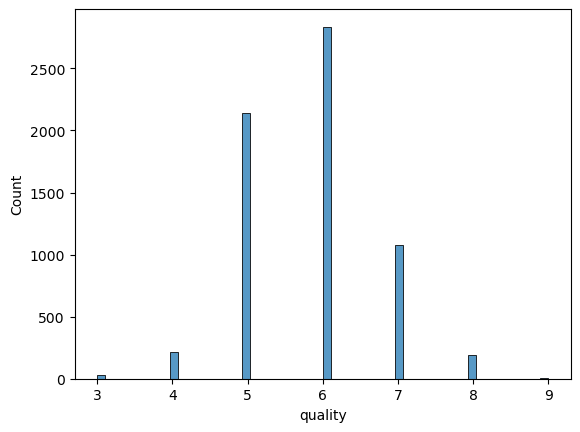

In [9]:
#imbalance data
sns.histplot(df['quality'])
plt.savefig('Before Sampling')
#plt.savefig('Before_Sampling.png', dpi=300, bbox_inches='tight') 
plt.show()

In [10]:
# #interpretation for above
# Balanced data is essential in machine learning to ensure fair and accurate predictions. 
# Imbalanced datasets, where one class dominates over others, can cause models to focus too much on 
# the majority class, leading to poor performance on the minority class and misleading metrics. 
# SMOTE (Synthetic Minority Oversampling Technique) helps address this by generating new, synthetic
# samples for the minority class. It works by identifying similar data points (nearest neighbors) in the 
# minority class and creating new samples by combining them. This approach avoids overfitting and improves 
# the model’s ability to learn patterns from all classes, resulting in better overall performance.

In [11]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate the features and the target
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

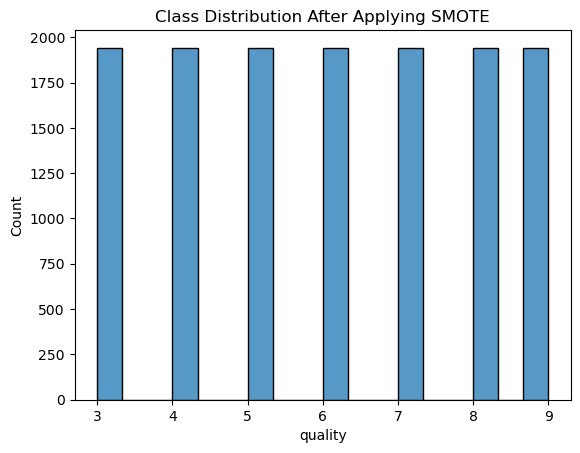

In [14]:

sns.histplot(y_train_resampled)
plt.title("Class Distribution After Applying SMOTE")
#plt.savefig("Class_Distribution_After_SMOTE.png", dpi=300)

# Display the plot
plt.show()


In [16]:
# #interpretation for above
# After applying the SMOTE method, the data becomes more uniform, with each class label having an equal 
# number of observations. Additionally, the total number of observations in the dataset increases.

In [17]:
column_names = X_train.columns  

# Convert X_train_resampled and y_train_resampled into DataFrames
X_resampled_df = pd.DataFrame(X_train_resampled, columns=column_names)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['quality'])

# Combine them into a single DataFrame
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
resampled_df.describe()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000,13594.000000
mean,0.195527,7.303346,0.373139,0.312034,4.959882,0.051496,29.181615,109.334720,0.994124,3.241793,0.512524,10.811874,6.000000
std,0.396621,1.227862,0.207887,0.136089,4.090854,0.030091,18.941188,54.418841,0.002985,0.148608,0.128310,1.239021,2.000074
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,0.000000,6.600000,0.249800,0.248289,1.958210,0.033094,14.606164,75.074296,0.991533,3.140000,0.426448,9.779144,4.000000
50%,0.000000,7.100000,0.309437,0.320000,3.250499,0.044000,27.492669,115.449655,0.994059,3.244525,0.490000,10.763034,6.000000
75%,0.000000,7.800000,0.414951,0.390000,7.053328,0.060637,40.000000,140.000000,0.996565,3.330000,0.571792,11.851900,8.000000
max,1.000000,15.600000,1.580000,1.230000,65.800000,0.611000,146.500000,344.000000,1.038980,4.010000,1.980000,14.050000,9.000000


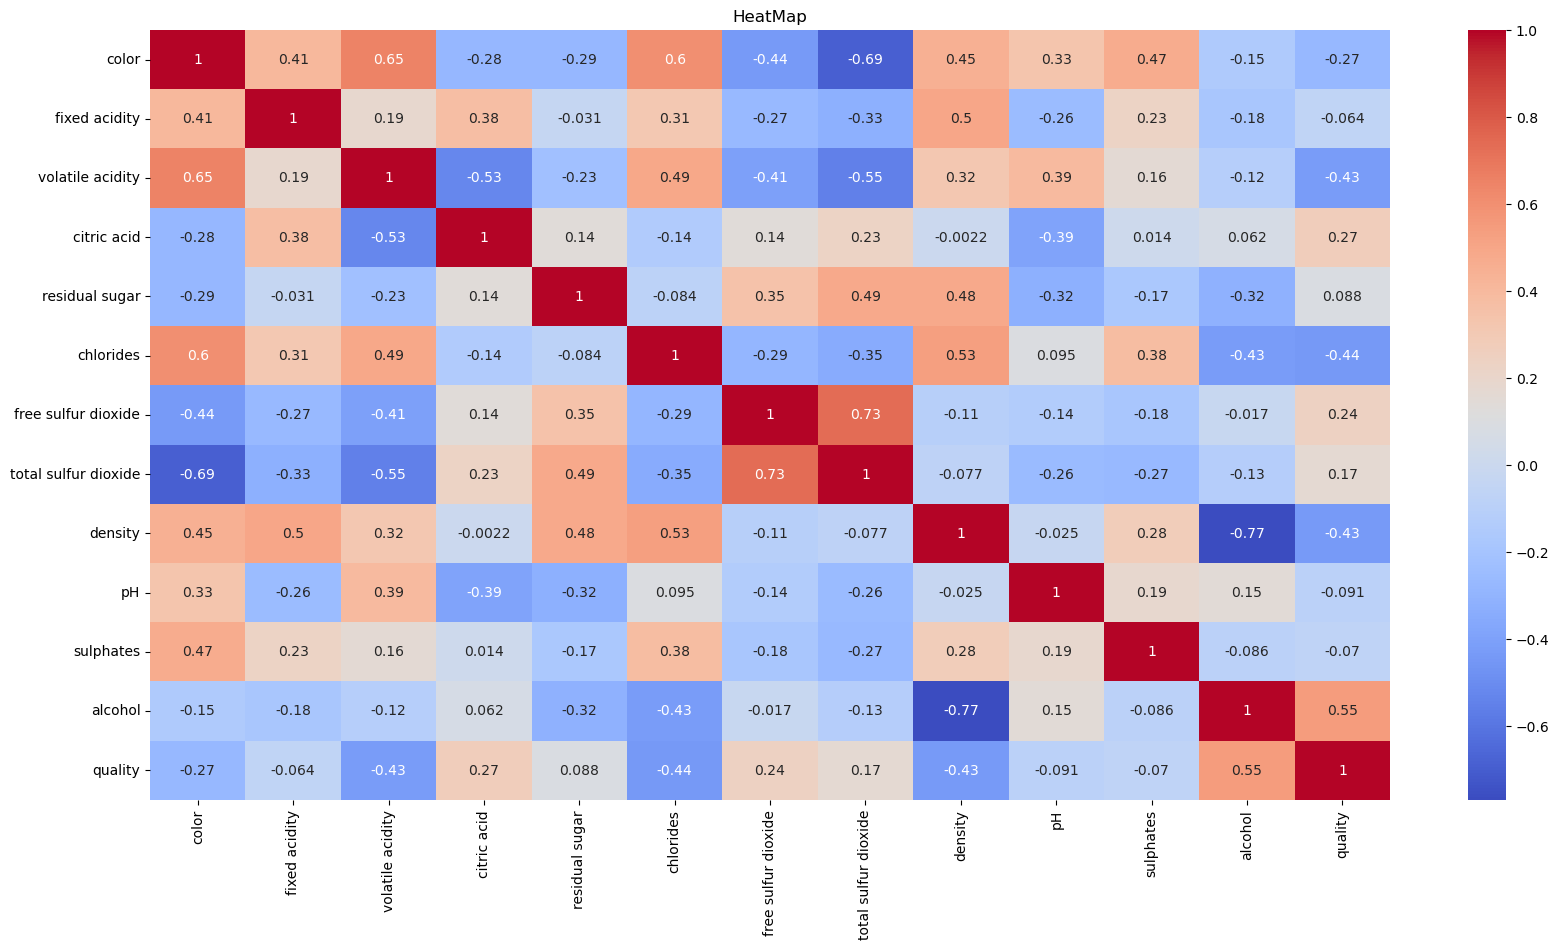

In [20]:
#alchol is highly correlated with quality and negatively correlated with volatile acidity,chlorides,density
plt.figure(figsize=(20,10))
sns.heatmap(resampled_df.corr(),annot=True, cmap='coolwarm')
plt.title("HeatMap")
plt.savefig("Correlation Matrix", dpi=300)

In [19]:
# #interpretation for correlation matrix
# The Pearson correlation was calculated between all the features in the data. This correlation shows the 
# linear relationship between the features, ranging from -1 to 1. From the plot, we can see that there is 
# multicollinearity between the features "free sulfur dioxide" and "total sulfur dioxide." The target variable, 
# "quality," is strongly related to "alcohol," while it has a negative relationship with "chlorides," "volatile acids,
# " and "density." This means that as the quality increases, the levels of chlorides, volatile acids, and density
# tend to decrease.

Text(0.5, 1.0, 'Boxplot for each Feature')

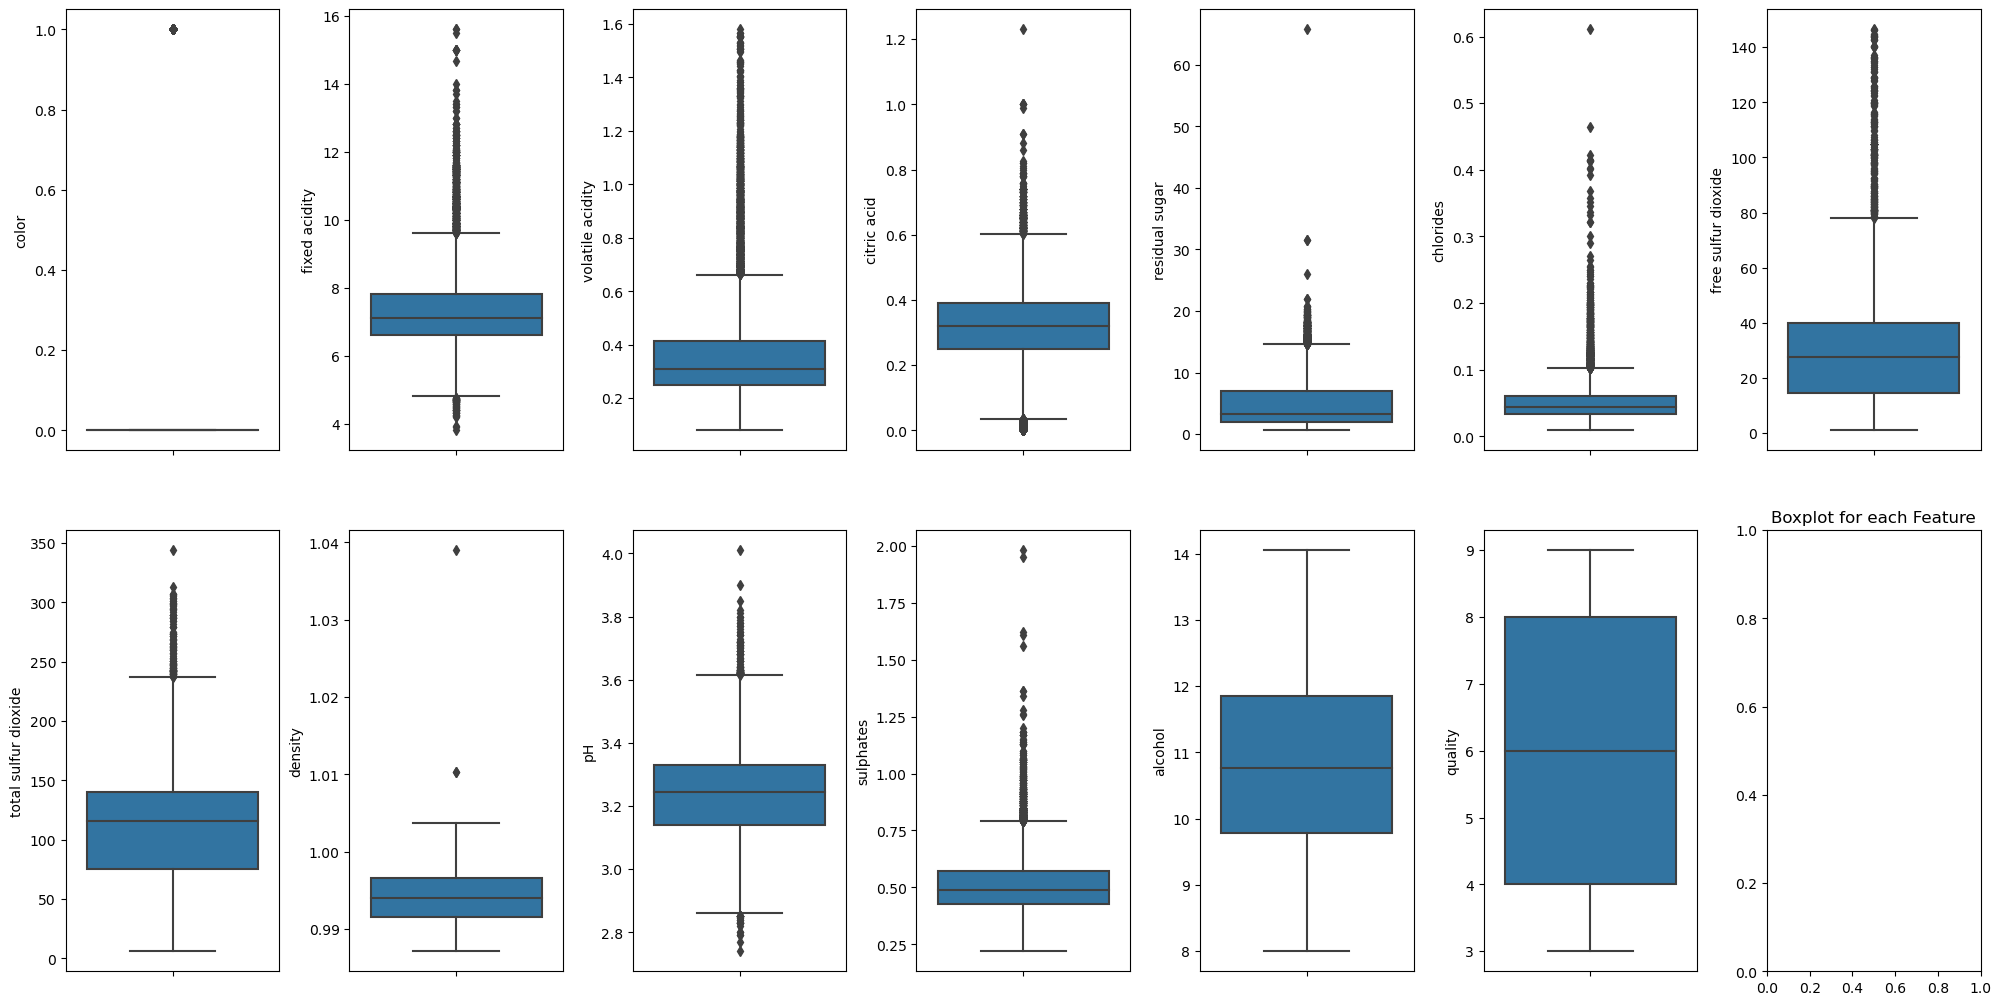

In [23]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in resampled_df .items():
    if col != 'type':
        sns.boxplot(y=col, data=resampled_df , ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.title("Boxplot for each Feature")
#plt.savefig("Boxplot", dpi=300)

In [24]:
# We can observe outliers in the columns for citric acid, residual sugar, chlorides, total sulfur dioxide,
# density, pH, and sulphates, with the highest values being considered outliers. The other outliers are within
# acceptable limits.

In [25]:
# Example for removing only the highest outlier values manually
def remove_specific_outliers(df, columns):
    for col in columns:
        # Identify the highest value in each column
        highest_value = df[col].max()
        # Remove rows where the value is equal to the highest value in that column
        df = df[df[col] != highest_value]
    return df

# Specify columns where you want to remove the highest outliers
outlier_columns = ['citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
resampled_df = remove_specific_outliers(resampled_df, outlier_columns)



In [26]:
#log transformation to total sulfur dioxide
resampled_df['total sulfur dioxide'] = np.log(resampled_df['total sulfur dioxide'] + 1)

IndexError: index 12 is out of bounds for axis 0 with size 12

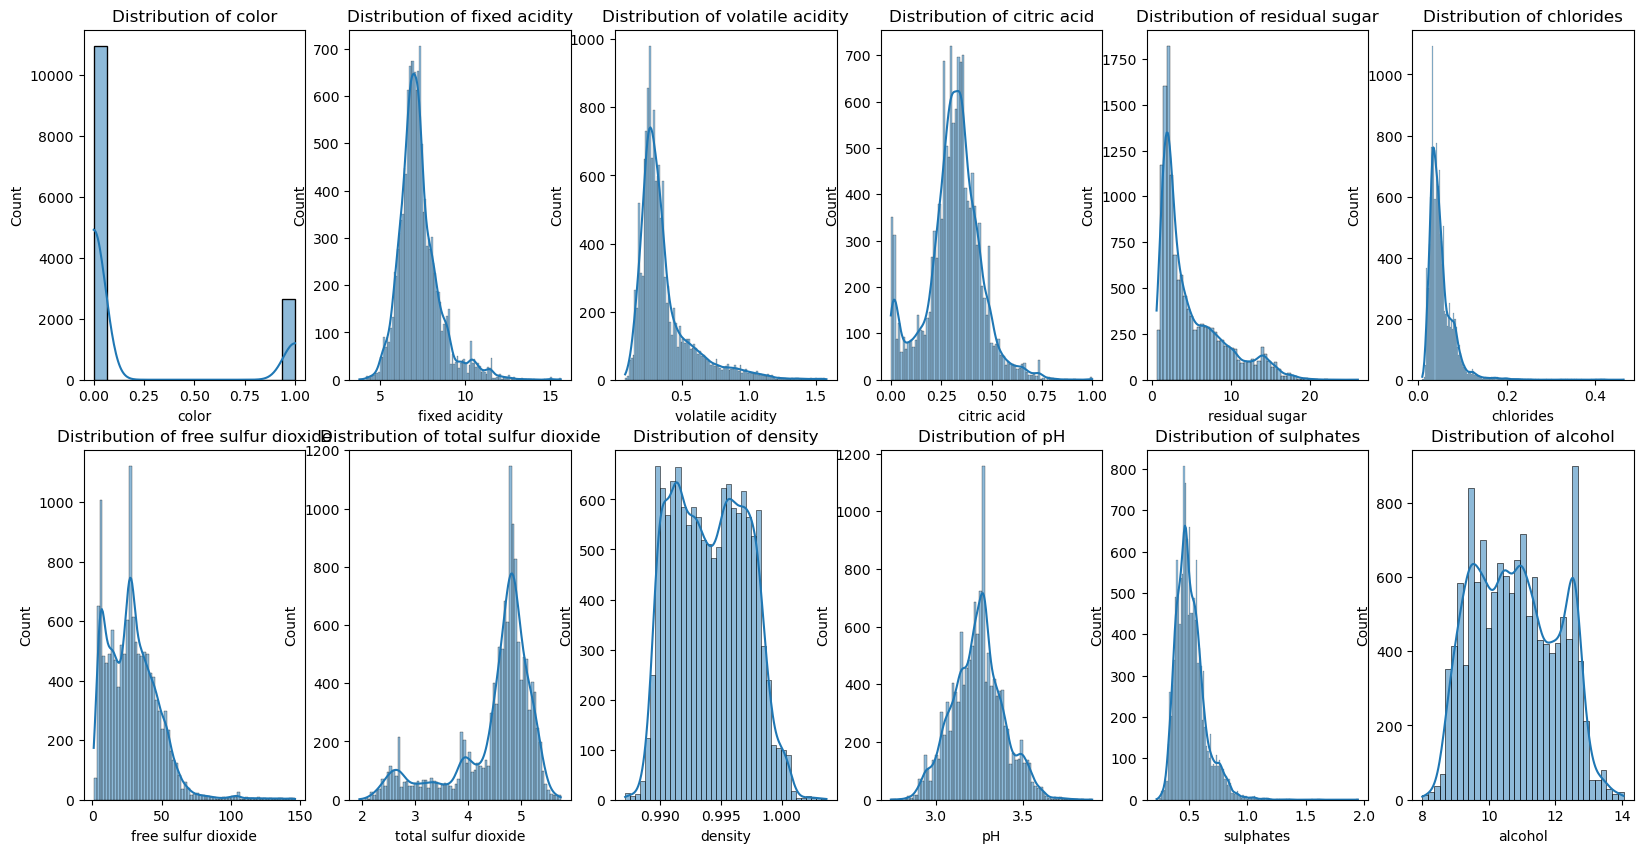

In [29]:
# Distribution has changed after removal of outliers
# Most of them have normal distribution

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in resampled_df.items():
    if col != 'type':  # Assuming 'type' is a column that shouldn't be plotted
        sns.histplot(value, ax=ax[index], kde=True)  # Use sns.histplot instead of sns.distplot (deprecated)
        ax[index].set_title(f"Distribution of {col}")
        index += 1

# Adjust layout
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Add a title for the entire figure
fig.suptitle("Feature Distribution After Removal of Outliers", fontsize=16, y=1.02)

# Save the figure
plt.savefig("Distribution.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# If you want to save it to a specific folder, provide the path
save_path = os.path.join(os.getcwd(), 'Distribution.png')  # Saves in the current directory
# or specify another directory
# save_path = '/path/to/your/folder/Distribution.png'

fig.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Image saved to: {save_path}")

In [38]:
# #interpretation for distributionn
# After eliminating the extreme outliers and applying a log transformation to the total sulfur dioxide,
# the data for all of them now follows an approximately normal distribution.